In [196]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [197]:
df=pd.read_csv('South_Africa_2020-08-01_to_2023-04-10.csv')
df.head(4)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,South Africa,2020-08-01,24.3,4.1,13.6,24.3,3.5,13.4,-4.0,36.7,...,13.8,7,NaN,2020-08-01T06:45:30,2020-08-01T17:41:55,0.42,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
1,South Africa,2020-08-02,25.0,4.8,14.5,25.0,3.9,14.4,-2.1,35.9,...,14.1,6,NaN,2020-08-02T06:44:53,2020-08-02T17:42:24,0.46,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
2,South Africa,2020-08-03,23.4,4.1,13.3,23.4,4.1,13.2,-0.3,44.1,...,14.6,7,NaN,2020-08-03T06:44:14,2020-08-03T17:42:52,0.50,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."
3,South Africa,2020-08-04,23.8,2.8,12.7,23.8,2.8,12.5,-2.8,39.8,...,14.7,7,NaN,2020-08-04T06:43:35,2020-08-04T17:43:21,0.52,Clear,Clear conditions throughout the day.,clear-day,"68264399999,FALA,68264099999,E0397,FAWB,682630..."


In [198]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              983 non-null    object 
 1   datetime          983 non-null    object 
 2   tempmax           983 non-null    float64
 3   tempmin           983 non-null    float64
 4   temp              983 non-null    float64
 5   feelslikemax      983 non-null    float64
 6   feelslikemin      983 non-null    float64
 7   feelslike         983 non-null    float64
 8   dew               983 non-null    float64
 9   humidity          983 non-null    float64
 10  precip            983 non-null    float64
 11  precipprob        983 non-null    int64  
 12  precipcover       983 non-null    float64
 13  preciptype        464 non-null    object 
 14  snow              983 non-null    int64  
 15  snowdepth         983 non-null    int64  
 16  windgust          982 non-null    float64
 1

In [199]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [200]:
df.describe()


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.000000,981.000000,983.000000,983.000000,983.000000,983.000000,983.000000,456.000000,983.000000
mean,25.860936,11.990641,18.312208,25.504273,11.704069,18.136826,8.982096,59.713632,2.851523,46.490336,...,18.436012,155.787691,1022.099388,34.502747,13.101628,180.045473,15.535097,7.250254,10.449561,0.481872
std,4.559974,4.904762,4.216539,4.161045,5.329601,4.311046,6.228631,15.694793,8.698552,49.902059,...,6.435972,116.588621,4.213998,25.868935,1.759234,64.481183,5.577203,2.025408,2.940001,0.287676
min,12.300000,-2.100000,5.700000,12.300000,-6.500000,4.000000,-12.000000,16.300000,0.000000,0.000000,...,7.200000,0.300000,1010.000000,0.000000,7.900000,19.500000,1.700000,1.000000,10.000000,0.000000
25%,22.700000,8.100000,15.000000,22.700000,7.200000,15.000000,4.200000,48.000000,0.000000,0.000000,...,13.500000,50.800000,1019.200000,9.850000,11.800000,133.750000,11.500000,6.000000,10.000000,0.250000
50%,26.400000,13.500000,19.100000,26.300000,13.500000,19.100000,10.900000,61.600000,0.000000,0.000000,...,17.500000,115.600000,1021.700000,33.800000,13.200000,174.900000,15.100000,7.000000,10.000000,0.500000
75%,29.200000,15.800000,21.500000,28.600000,15.800000,21.500000,14.000000,70.950000,0.800000,100.000000,...,22.150000,275.200000,1024.700000,56.000000,14.350000,227.500000,19.600000,9.000000,10.000000,0.740000
max,37.100000,20.000000,26.700000,36.100000,20.000000,25.600000,18.800000,94.100000,91.024000,100.000000,...,46.300000,359.600000,1036.300000,98.500000,17.400000,358.200000,30.900000,10.000000,30.000000,0.980000


In [201]:
df.shape

(983, 33)

In [202]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          519
snow                  0
snowdepth             0
windgust              1
windspeed             0
winddir               0
sealevelpressure      2
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          527
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [203]:
df['windgust'].fillna(df['windgust'].mean(), inplace=True)
df['sealevelpressure'].fillna(df['sealevelpressure'].mean(), inplace=True)
df=df.drop(columns=['preciptype', 'severerisk'], axis=1)

df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

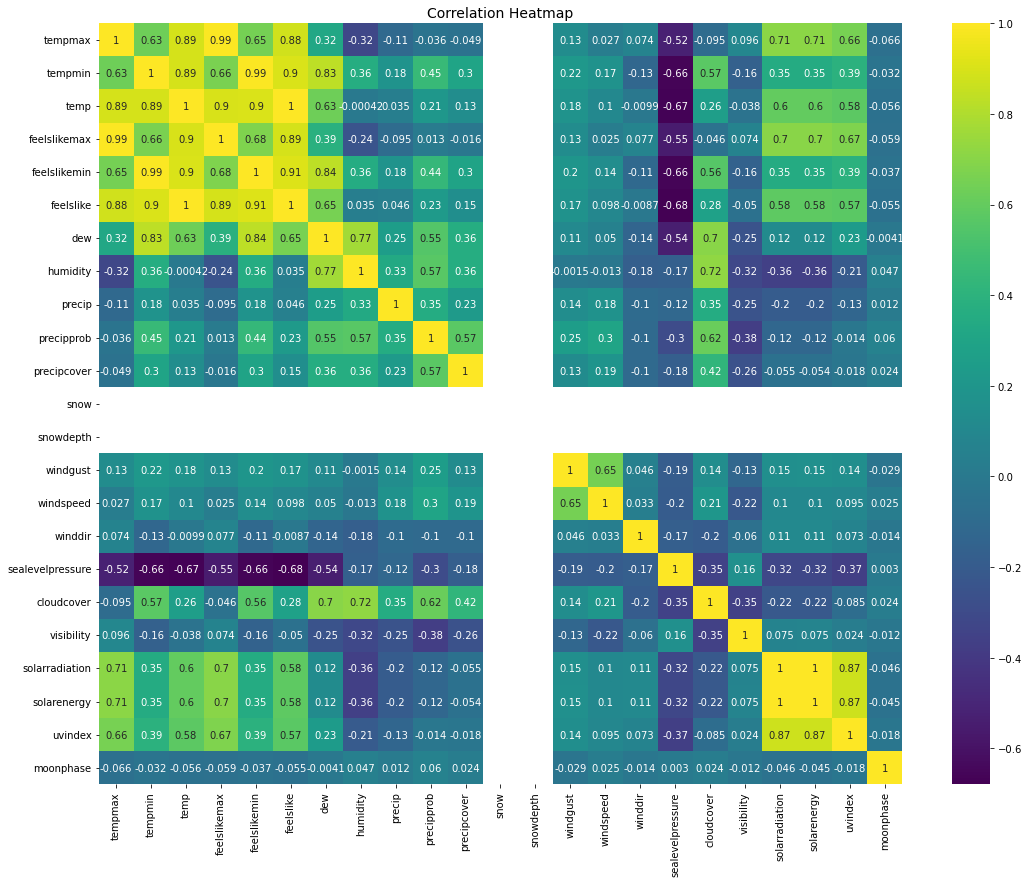

In [204]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [205]:
df.columns,df.shape

(Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
        'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
        'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
        'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
        'conditions', 'description', 'icon', 'stations'],
       dtype='object'),
 (983, 31))

In [206]:
df.shape

(983, 31)

In [207]:
df.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [208]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Drop non-numeric columns from the DataFrame
df_numeric = df[numeric_cols]
df_numeric

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
0,24.3,4.1,13.6,24.3,3.5,13.4,-4.0,36.7,0.0,0,...,24.1,9.3,186.2,1031.2,0.0,13.7,162.7,13.8,7,0.42
1,25.0,4.8,14.5,25.0,3.9,14.4,-2.1,35.9,0.0,0,...,24.1,12.7,59.4,1031.1,0.0,14.1,162.8,14.1,6,0.46
2,23.4,4.1,13.3,23.4,4.1,13.2,-0.3,44.1,0.0,0,...,14.7,8.6,33.2,1030.6,0.0,12.1,170.2,14.6,7,0.50
3,23.8,2.8,12.7,23.8,2.8,12.5,-2.8,39.8,0.0,0,...,18.4,10.8,271.7,1025.8,0.8,13.1,170.6,14.7,7,0.52
4,24.3,4.0,14.0,24.3,4.0,13.9,-2.2,37.5,0.0,0,...,20.7,20.5,7.8,1024.0,3.8,13.9,168.7,14.5,7,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,26.6,11.1,18.2,26.6,11.1,18.2,11.3,66.8,0.0,0,...,20.5,9.0,114.3,1020.9,16.6,15.2,177.7,15.4,8,0.50
979,27.5,12.2,19.3,27.2,12.2,19.3,11.8,64.8,0.0,0,...,29.5,16.7,278.2,1017.0,18.9,13.5,173.5,15.1,7,0.54
980,28.3,12.9,20.7,27.4,12.9,20.5,10.1,53.5,0.0,0,...,16.2,12.8,298.9,1018.0,7.3,10.0,223.1,19.3,8,0.58
981,28.0,14.5,20.5,27.2,14.5,20.4,11.5,59.2,0.3,100,...,55.2,31.9,326.9,1019.2,48.8,10.0,175.0,15.1,9,0.62


In [209]:
df_numeric.shape

(983, 23)

In [210]:
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')

uni = SelectKBest(score_func = f_classif, k = 10)
X = df_numeric.drop(labels=['tempmax'], axis=1)
y=df_numeric['tempmax']
fit = uni.fit(X, y)
X.columns[fit.get_support(indices=True)].tolist()

['tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'sealevelpressure',
 'solarradiation',
 'solarenergy',
 'uvindex']

In [211]:
#Selecting features with high covariancce
X.columns[fit.get_support(indices=True)].tolist()
cor = df.corr()
cor_target = abs(cor["tempmax"])
relevant_features = cor_target[cor_target > 0.6]
relevant_features.index

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [212]:
df_features = df[['tempmax','tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike', 'solarradiation', 'solarenergy', 'uvindex']]
df_features

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarradiation,solarenergy,uvindex
0,24.3,4.1,13.6,24.3,3.5,13.4,162.7,13.8,7
1,25.0,4.8,14.5,25.0,3.9,14.4,162.8,14.1,6
2,23.4,4.1,13.3,23.4,4.1,13.2,170.2,14.6,7
3,23.8,2.8,12.7,23.8,2.8,12.5,170.6,14.7,7
4,24.3,4.0,14.0,24.3,4.0,13.9,168.7,14.5,7
...,...,...,...,...,...,...,...,...,...
978,26.6,11.1,18.2,26.6,11.1,18.2,177.7,15.4,8
979,27.5,12.2,19.3,27.2,12.2,19.3,173.5,15.1,7
980,28.3,12.9,20.7,27.4,12.9,20.5,223.1,19.3,8
981,28.0,14.5,20.5,27.2,14.5,20.4,175.0,15.1,9


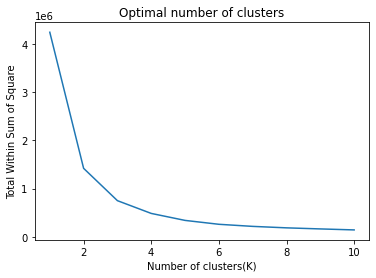

*From the chart we can see that the optimal number of k clusters is 3*


In [213]:
#finding the number of clusters using the Elbow method

import warnings
warnings.filterwarnings('ignore')

WSS=[]
clusters=range(1,11)

for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster, random_state=None)
    kmeans=kmeans.fit(df_features)
    WSS.append(kmeans.inertia_)
    
plt.plot(clusters,WSS)
plt.xlabel("Number of clusters(K)")
plt.ylabel("Total Within Sum of Square")
plt.title("Optimal number of clusters")
plt.show()

print("*From the chart we can see that the optimal number of k clusters is 3*")

In [214]:
clusters=[2,3,4,5,6]
my_list=[]
for cluster in clusters:
    km_model=KMeans(n_clusters=cluster,random_state=42)
    pred=km_model.fit_predict(df_features)
    #centers=km_model.cluster_centers_
    score=silhouette_score(df_features,pred)
    print("For n_cluster: ",cluster,"\n""The Silhouette score is: ",score,"\n","*"*43)
    my_list.append(score)
    
    num_close=my_list[0]
    for num in my_list:
        if abs(num-1)<abs(num_close-1):
            num_close=num
            
print("\n""The score closest to 1 is: ",num_close)

For n_cluster:  2 
The Silhouette score is:  0.5555272950206323 
 *******************************************
For n_cluster:  3 
The Silhouette score is:  0.4999272066036443 
 *******************************************
For n_cluster:  4 
The Silhouette score is:  0.4830728929848789 
 *******************************************
For n_cluster:  5 
The Silhouette score is:  0.46496222758083394 
 *******************************************
For n_cluster:  6 
The Silhouette score is:  0.4424905590937495 
 *******************************************

The score closest to 1 is:  0.5555272950206323


In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
pca.fit(df_features)

df_pca_compenents = pd.DataFrame(
    data=pca.components_.round(2),
    columns=df_features.columns.values,
    index=['component 1','component 2']
)

df_pca_compenents

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarradiation,solarenergy,uvindex
component 1,0.05,0.03,0.04,0.05,0.03,0.04,0.99,0.09,0.03
component 2,-0.28,-0.50,-0.38,-0.27,-0.55,-0.39,0.09,0.01,-0.02


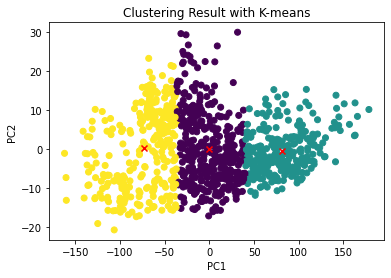

In [216]:

X=df_features

# Instantiate PCA with desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA to the dataset
X_pca = pca.fit_transform(X)

# Initialize K-means clustering algorithm
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# Fit K-means to the reduced-dimensionality data
kmeans.fit(X_pca)

# Access the cluster labels assigned to each data point after clustering
labels = kmeans.labels_

# Plot the clustering result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Result with K-means')
plt.show()


In [235]:
pca_scores = pca.transform(X)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_
    
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

df_segm_pca = pd.concat([df_features.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2','component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarradiation,solarenergy,component 1,component 2,component 3,K-means PCA
0,24.3,4.1,13.6,24.3,3.5,13.4,162.7,13.8,7,-18.307972,11.300170,2
1,25.0,4.8,14.5,25.0,3.9,14.4,162.8,14.1,6,-18.038285,9.649700,2
2,23.4,4.1,13.3,23.4,4.1,13.2,170.2,14.6,7,-10.892716,12.309292,2
3,23.8,2.8,12.7,23.8,2.8,12.5,170.6,14.7,7,-10.573732,13.984838,2
4,24.3,4.0,14.0,24.3,4.0,13.9,168.7,14.5,7,-12.252904,11.254861,2
...,...,...,...,...,...,...,...,...,...,...,...,...
978,26.6,11.1,18.2,26.6,11.1,18.2,177.7,15.4,8,-2.273051,0.075394,2
979,27.5,12.2,19.3,27.2,12.2,19.3,173.5,15.1,7,-6.268714,-2.677562,2
980,28.3,12.9,20.7,27.4,12.9,20.5,223.1,19.3,8,43.477283,-0.382089,1
981,28.0,14.5,20.5,27.2,14.5,20.4,175.0,15.1,9,-4.482203,-6.012192,2


In [236]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarradiation,solarenergy,component 1,component 2,component 3
K-means PCA,,,,,,,,,,,
0,21.8761,9.9655,15.2516,21.8816,9.5361,15.0806,108.1484,9.3174,5.1419,-72.5842,0.4028
1,29.5942,14.7658,21.6532,28.8755,14.7194,21.4892,261.0701,22.5414,9.3201,81.7426,-0.5289
2,26.3608,11.6268,18.3628,25.9747,11.2833,18.1759,179.4461,15.4838,7.4481,-0.5654,0.0561


In [237]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5059480717160657


In [238]:
#from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
#davies_bouldin = davies_bouldin_score(X_pca, labels)
#print("Davies-Bouldin Index:", davies_bouldin)


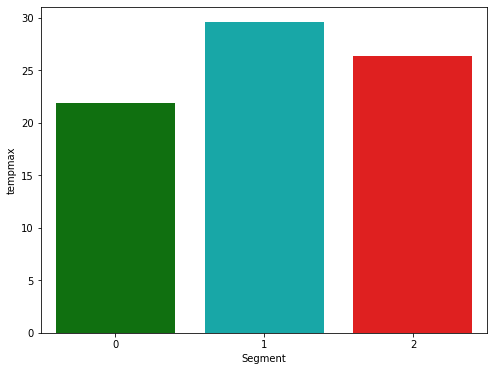

In [239]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='tempmax', palette=['g','c','b'])
plt.xlabel('Segment')
plt.ylabel('tempmax')
plt.show()

In [243]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'Hot',
    1: 'Mild',
    2: 'Cold',
})
df_segm_pca.tail()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,solarradiation,solarenergy,component 1,component 2,component 3,K-means PCA,Segment
978,26.6,11.1,18.2,26.6,11.1,18.2,177.7,15.4,8,-2.273051,0.075394,2,Cold
979,27.5,12.2,19.3,27.2,12.2,19.3,173.5,15.1,7,-6.268714,-2.677562,2,Cold
980,28.3,12.9,20.7,27.4,12.9,20.5,223.1,19.3,8,43.477283,-0.382089,1,Mild
981,28.0,14.5,20.5,27.2,14.5,20.4,175.0,15.1,9,-4.482203,-6.012192,2,Cold
982,18.9,14.5,16.6,18.9,14.5,16.6,91.6,7.9,4,-89.044908,-5.466912,0,Hot


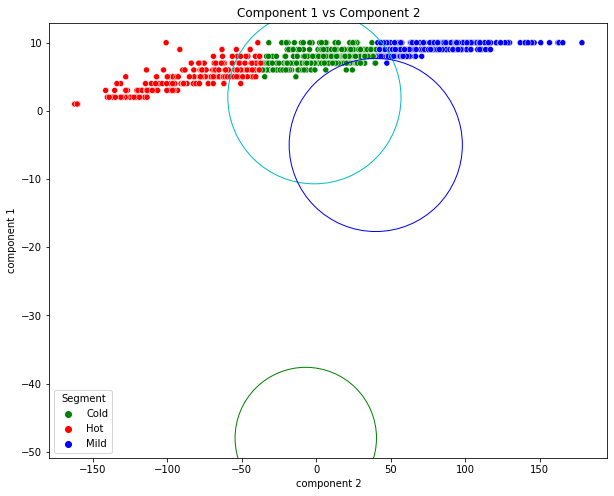

In [246]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','b']
)
plt.scatter(-7, -48 , s=20000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=30000, facecolors='none', edgecolors='c' )
plt.scatter(40, -5 , s=30000, facecolors='none', edgecolors='b' )
plt.title('Component 1 vs Component 2')
plt.show()